Sampling a (3,1) Gaussian Random Field
======================================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
####################################################
N = 128  # we discretize our volume using N**3 cells

Generating an uncorrelated (white) Gaussian random field
========================================================

A Gaussian random field with no correlations is a real scalar random field defined for every point of a multidimensional space $S\subset\mathbb{R}^n$. It has a normal distribution at every point $x\in S$. The value at a point $x\in S$ is independent of the value at any other point $y\neq x$, i.e.
$$ \mathbb{E}[f(x)\,f(x')] = \delta_D(x-x')$$

In [3]:
# create an uncorrelated Gaussian random field of size N**d, d=3
f0 = np.random.normal(size=[N,N,N])

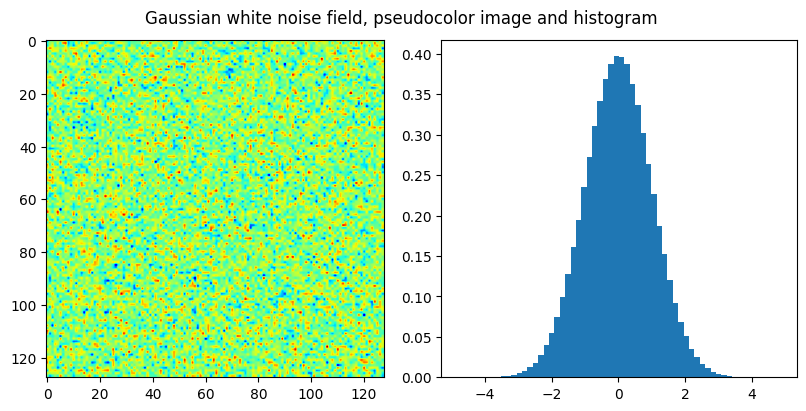

In [4]:
fig, ax = plt.subplots(1,2,figsize=[8,4],layout='constrained')
fig.suptitle('Gaussian white noise field, pseudocolor image and histogram')
ax[0].imshow(f0[...,N//2], cmap='jet')
ax[1].hist(f0.flatten(),bins=60,density=True)
plt.show()

The Fourier modes $[-N/2, -N/2+1, \ldots, N/2-1]$ are reordered (periodically remapped) to $\mathbf{k}:=[0,1,2,\ldots\pm N/2,\ldots, -2, -1]$ in the output of the FFT (for technical reasons). We can obtain the positive and negative modes by calling the `fftfreq` function, which gives the modes for a one-dimensional transform. We can then use the `meshgrid` function to create a two-dimensional grid of modes, or we could obtain them by taking outer products with a vector of ones. Let the vector of ones be denoted by $\mathbf{1}$ then the outer product is 
$$
\begin{align}
  k_x &= \mathbf{k}\otimes\mathbf{1}\otimes\mathbf{1} \\
  k_y &= \mathbf{1}\otimes\mathbf{k}\otimes\mathbf{1} \quad\ldots
  \end{align}
$$ 

In [6]:
# Fourier transform the uncorrelated real field -> yields uncorrelated complex field with Hermitian symmetry
ff0 = np.fft.fftn(f0)

# set up the modes associated with the array entries returned by fftn
k_1d = np.fft.fftfreq(N)
# create the 3D grid of wave numbers
kx, ky, kz  = np.meshgrid(k_1d,k_1d,k_1d, indexing='ij')

# Imposing correlations

Now we want to create a realisation of a stationary Gaussian random field with a given isotropic power spectrum. For simplicity, we shall assume a power-law power spectrum of the form
$$ P(k) = k^\alpha$$
where $k=\|\mathbf{k}\|$ is the mode vector-norm. According to the Karhunen-Loève theorem, the field can be generated by taking the inverse Fourier transform of the square root of the power spectrum times a white noise field. We already generated the white noise field, so we only need to multiply it by the square root of the power spectrum. 

In [7]:
#we define an isotropic power spectrum P(k) = k**alpha
def P(k):
  alpha = -3.0
  return np.where(k>0,k**(alpha),0.0)  # set P(k) = 0 for k=0, otherwise k**alpha

# compute vector norm for each entry (i,j,k)
k = np.sqrt(kx**2 + ky**2 + kz**2)

# Karhunen-Loève: multiply uncorrelated Gaussian field with sqrt of power spectrum and apply invere Fourier transform
ff1 =  np.sqrt( P(k) ) * ff0
f1  = np.fft.ifftn(ff1).real

/var/folders/m8/1yjz77r957vbsrx_2s2hdj1r0000gn/T/ipykernel_34502/3244553015.py:4: RuntimeWarning: divide by zero encountered in power
  return np.where(k>0,k**(alpha),0.0)  # set P(k) = 0 for k=0, otherwise k**alpha


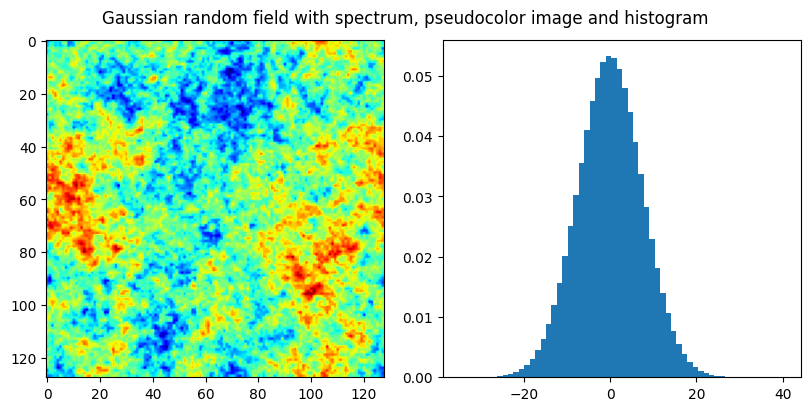

In [8]:
fig, ax = plt.subplots(1,2,figsize=[8,4],layout='constrained')
fig.suptitle('Gaussian random field with spectrum, pseudocolor image and histogram')
ax[0].imshow(f1[...,N//2], cmap='jet')
ax[1].hist(f1.flatten(),bins=60,density=True);